# Credit Card Fraud Detection with Machine Learning Models
## Data Exploration and Preperation
### Ian Heung

In this project, I will use a dataset [from Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data) and develop machine learning models to determine whether a transaction is fraudulent or not. The dataset is highly unbalanced, with the number of fraud cases only accounting for **only 0.172%** of transactions. I will navigate the challenge of the class imbalance in the dataset and develop machine learning models for accurate classification of the transactions.

## Data Overview

The dataset composes of credit card transactions made by European cardholders during September 2013, spanning a period of two days. There are 492 fraud cases out of a total of 284,807 transactions. This dataset is heavily imbalanced, with the positive class (fraud cases) comprising only 0.172% of all transactions.

With the expection of Time and Amount, all input variables have undergone a Principal Component Analysis (PCA) transformation to protect confidentiality. As a result, the original features and further background details are not included. 

Key aspects of the dataset are as follows:

- Features V1 through V28 represent the principal components derived via PCA.
- Two features, Time and Amount, remain untransformed. Time represents the seconds that have elapsed since the first transaction, and Amount reflects the transaction value, which may be useful for implementing cost-sensitive learning models.
- The target variable, Class, indicates whether a transaction is fraudulent (1) or not (0).

## Objectives
- Explore and understand the dataset given the limited information we have about the PCA transformed features
- Formulate solutions and workarounds to the class imbalance problem
- Use various model types and evaluate which best fits our usecase
- Evaluate the models using appropriate evaluation metrics

In [3]:
# imports
import os
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## Data Exploration

#### Preliminary Data Exploration

Lets conduct an initial glimpse of our data

In [4]:
filepath = 'creditcard.csv' # change filepath accordingly 
df = pd.read_csv(filepath)
df.head() 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
df.isnull().sum().sum()

0

In [7]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [8]:
num_non_fraud = df['Class'].value_counts()[0] # number of non-fraudulent transactions
num_fraud = df['Class'].value_counts()[1] # number of fraudulent transactions
no_fraud_percent = round(df['Class'].value_counts()[0]/len(df) * 100,2) # percentage of non-fraudulent transactions
fraud_percent = round(df['Class'].value_counts()[1]/len(df) * 100,2) # percentage of fraudulent transactions

print('No Frauds: ',num_non_fraud , f'({no_fraud_percent}%)')
print('Frauds: ', num_fraud, f'({fraud_percent}%)')

No Frauds:  284315 (99.83%)
Frauds:  492 (0.17%)


#### Visualizations
As mentioned earlier, our dataset is very imbalanced. Most transactions are non-fraud, while only **0.17%** of the data is fraudulent. Thinking ahead about our classification models, we need to figure out a way to deal with this imbalance to prevent model overfitting. We can also visualize how imbalanced the data actually is.

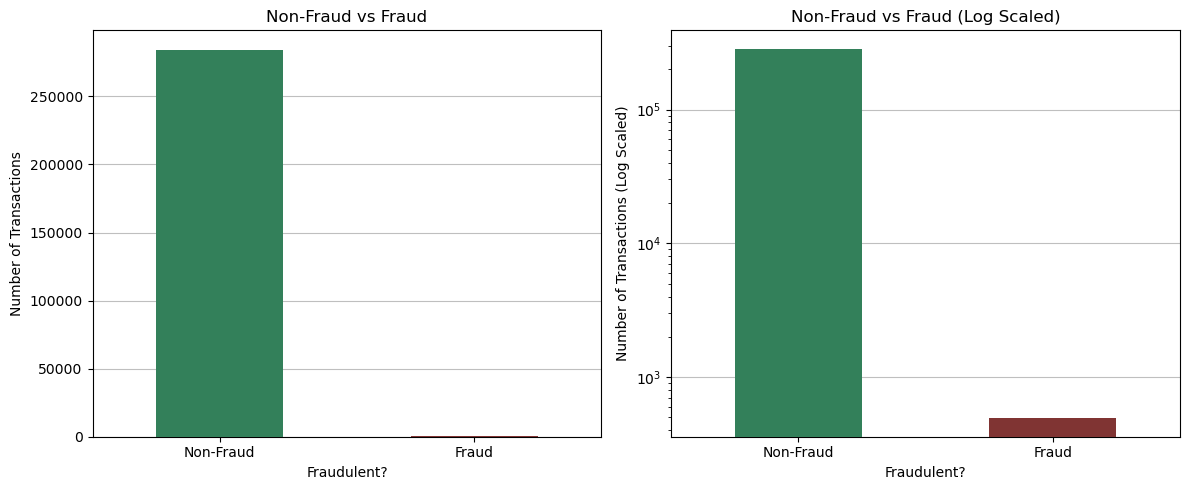

In [9]:
class_counts = df['Class'].value_counts()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

ax1 = class_counts.plot(kind='bar', ax=axes[0], color=['#33805a', '#803433'], zorder=3)
ax1.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax1.set_xticklabels(['Non-Fraud', 'Fraud'])
ax1.set_title('Non-Fraud vs Fraud')
ax1.set_xlabel('Fraudulent?')
ax1.set_ylabel('Number of Transactions')
ax1.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

ax2 = class_counts.plot(kind='bar', ax=axes[1], color=['#33805a', '#803433'], zorder=3, logy=True)
ax2.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax2.set_xticklabels(['Non-Fraud', 'Fraud'])
ax2.set_title('Non-Fraud vs Fraud (Log Scaled)')
ax2.set_xlabel('Fraudulent?')
ax2.set_ylabel('Number of Transactions (Log Scaled)')
ax2.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

plt.tight_layout()

plt.show()


We see even in the log scaled plot, the number of non-fraud cases still overwhelmingly outnumbers the number of fraud cases.

Lets now see histogram distributions of the time and transaction amount values to see the data spread. 

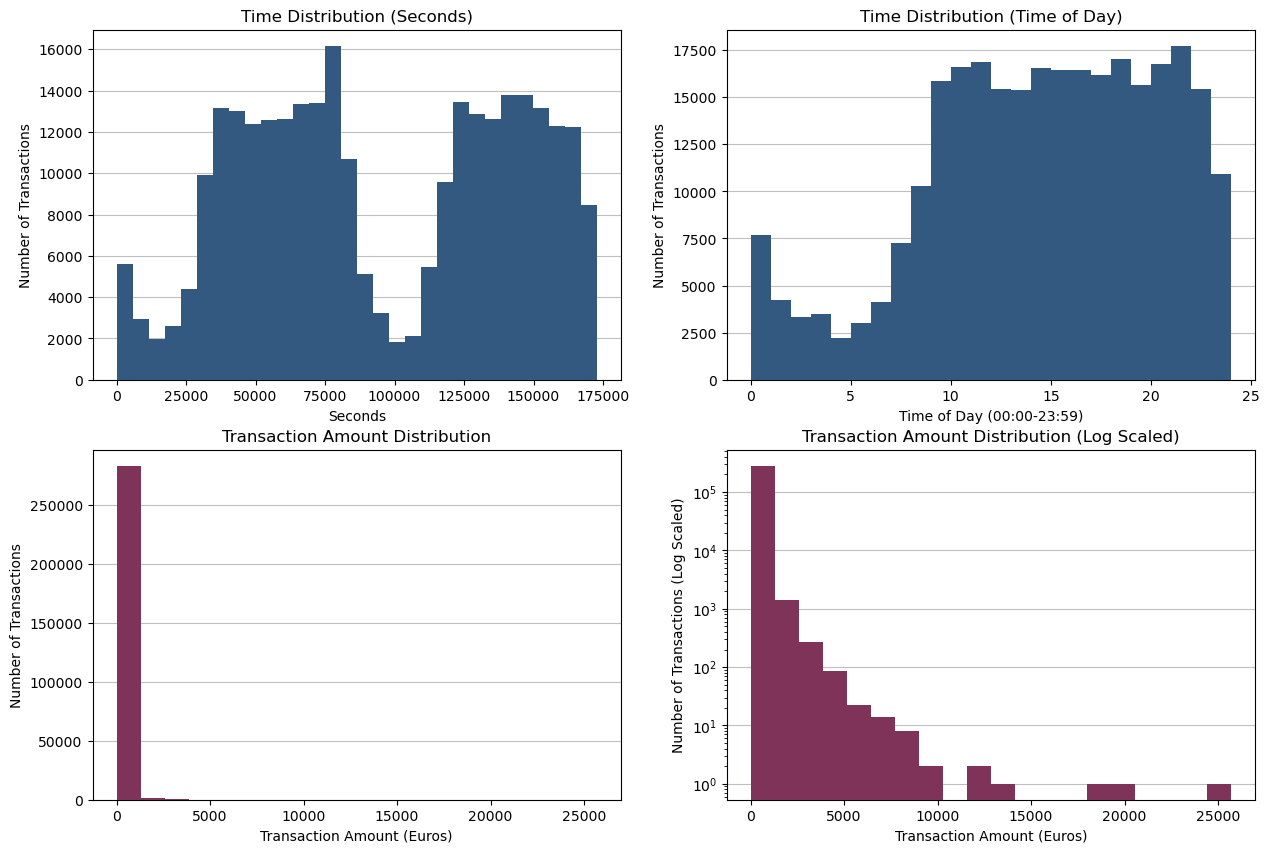

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# seconds histogram
ax1 = df['Time'].plot(kind='hist', bins=30, ax=axes[0][0], color='#335980', zorder=3)
ax1.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax1.set_title('Time Distribution (Seconds)')
ax1.set_xlabel('Seconds')
ax1.set_ylabel('Number of Transactions')

# convert the seconds to hours for easier interpretation
def convert_seconds(x):
    
    DAY = 86400
    # we assume that 0 seconds marks the start of a new day, 00:00 AM
    hour = x / DAY * 24
    # since the dataset spans two days, convert the second day entries into hour of day
    # eg. if hour = 36, it means 12:00 PM on the second day, so return 12
    if hour >= 24:
        hour = hour - 24
    return hour

df['transaction_time'] = df['Time'].apply(lambda x: convert_seconds(x))

# hours histogram
ax2 = df['transaction_time'].plot(kind='hist', bins=24, ax=axes[0][1], color='#335980', zorder=3)
ax2.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax2.set_title('Time Distribution (Time of Day)')
ax2.set_xlabel('Time of Day (00:00-23:59)')
ax2.set_ylabel('Number of Transactions')

# transaction amount histogram
ax3 = df['Amount'].plot(kind='hist', bins=20, ax=axes[1][0], color='#803359', zorder=3)
ax3.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax3.set_title('Transaction Amount Distribution')
ax3.set_xlabel('Transaction Amount (Euros)')
ax3.set_ylabel('Number of Transactions')

# transaction amount histogram log scaled
ax4 = df['Amount'].plot(kind='hist', bins=20, ax=axes[1][1], color='#803359', zorder=3, logy=True)
ax4.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax4.set_title('Transaction Amount Distribution (Log Scaled)')
ax4.set_xlabel('Transaction Amount (Euros)')
ax4.set_ylabel('Number of Transactions (Log Scaled)')

plt.show()


The top left plot is the distribution of transactions across two days, which is why we see two dips in transaction activity, as those dips are midnight hours when we expect transaction activity to be at its lowest. Thne we see an increase and a gradual plateau. If we look at the top right plot where we converted the seconds into hours of the day, we see on the x-axis a scale from 0 - 24, indicating the time of day. The plateau begins at around 09:00, and ends at 22:00.

The bottom left plot shows the transaction amount distribution, and we see most transactions are within €0 - €1250. There is a large range of transactions, but almost all the transaction amounts are within the €0 - €1250 range. If we use log scaling, we can view the distribution with more clarity. On the bottom right, we see a log scaled distribution of the transaction amounts. We see that the largest transactions make up an insignificant proportion of the total number of transactions.

We will now compare the differences in distributions of fraudulent and non-fraudulent transactions by overlaying them over each other for transaction time and transaction amount respectively.  

In [11]:
# first, compare the aggregate statistics after grouping the classes
df[['Class','transaction_time']].groupby('Class').describe()

transaction_time                                                       \
                 count       mean       std       min        25%        50%   
Class                                                                         
0             284315.0  14.542106  5.844597  0.000000  10.601389  15.014167   
1                492.0  12.136986  6.719614  0.112778   5.923819  12.052361   

                             
             75%        max  
Class                        
0      19.332778  23.999444  
1      17.803681  23.993333

In [12]:
df[['Class','Amount']].groupby('Class').describe()

Amount                                                            
          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87

We see that there aren't major differences between the classes for transaction time.

But for transaction amount, we see more differences. For the 25% and 50% quartiles, the transaction amount for fraudulent cases is much lower than non-fraudulent cases, but we see that for the 75% quartile, the transaction amount is much higher than non-fraudulent transactions. We also see that for non-fraudulent transactions, the maximum amount is much larger than for fraudulent transactions. To allow better visualization when plotting, we will remove non-fraudulent transactions (class 0) from our plotting to avoid disproportionately skewing the x-axis.

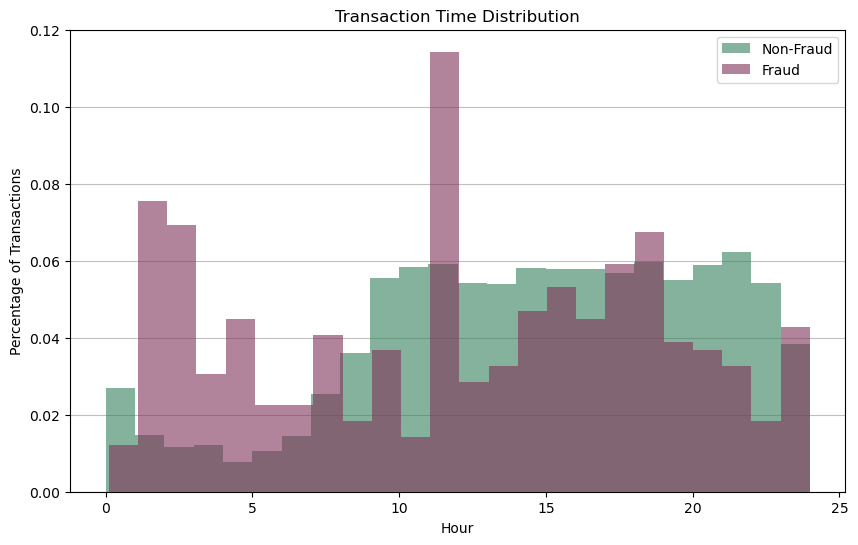

In [13]:
# split the classes
time_0 = df['transaction_time'].loc[df['Class'] == 0]
time_1 = df['transaction_time'].loc[df['Class'] == 1]

# overlay the plots
plt.figure(figsize=(10, 6))

ax = time_0.plot(kind='hist', bins=24, color='#33805a', zorder=3, alpha= 0.6, density=True)
ax = time_1.plot(kind='hist', bins=24, color='#803359', zorder=3, alpha= 0.6, density=True)
ax.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax.set_title('Transaction Time Distribution')
ax.set_xlabel('Hour')
ax.set_ylabel('Percentage of Transactions')
ax.legend(['Non-Fraud', 'Fraud'])

plt.show()


Our aggregate statistics showed not much difference between the two classes, but when we look at the distribution, we see a larger proportion of fraudlent cases occur during midnight. There is also a spike in fraudulent cases during 12:00. While the non-fraudulent transactions plateau, the fraudulent transactions are more sporadic.

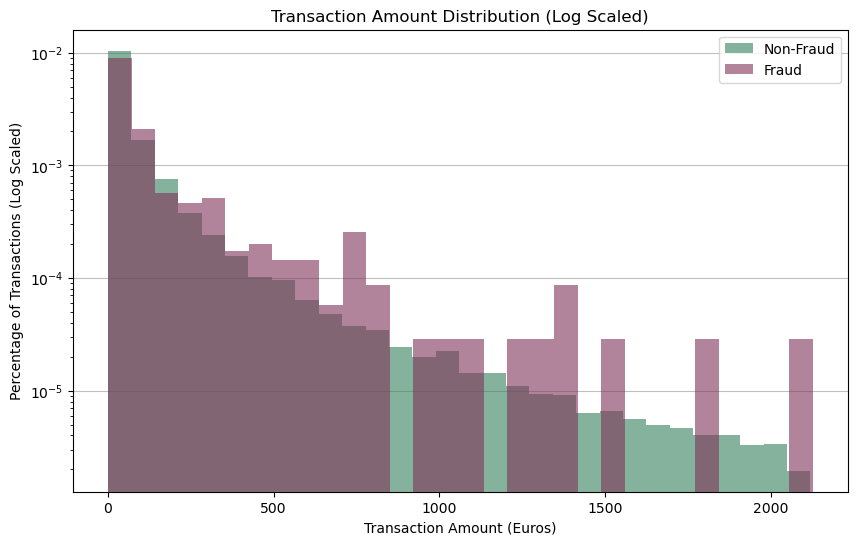

In [14]:
amount_0 = df['Amount'].loc[df['Class'] == 0]
amount_1 = df['Amount'].loc[df['Class'] == 1]

# set the threshold to the maximum amount in class 1
threshold = amount_1.max()

amount_0_filtered = amount_0[amount_0 <= threshold]

# # overlay the plots
plt.figure(figsize=(10, 6))

ax = amount_0_filtered.plot(kind='hist', bins=30, color='#33805a', zorder=3, logy=True, alpha= 0.6, density=True)
ax = amount_1.plot(kind='hist', bins=30, color='#803359', zorder=3, logy=True, alpha= 0.6, density=True)
ax.grid(color='gray', axis='y', alpha=0.5, zorder=1)
ax.set_title('Transaction Amount Distribution (Log Scaled)')
ax.set_xlabel('Transaction Amount (Euros)')
ax.set_ylabel('Percentage of Transactions (Log Scaled)')
ax.legend(['Non-Fraud', 'Fraud'])

plt.show()


The data for the two classes follow similiar trends, where as the transaction amount increases, there are less transactions. But for fraudulent cases, due to there not being as much data points, we the distribution is not exactly the same as non-fraudulent cases.

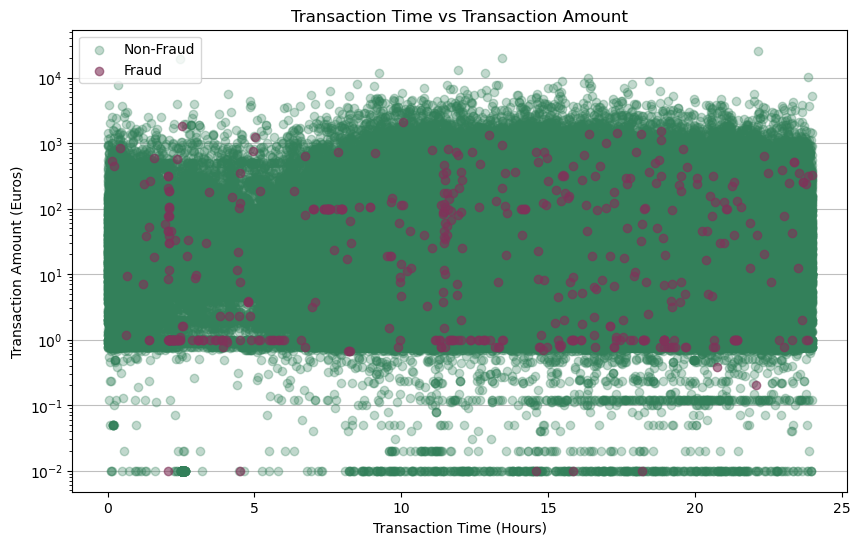

In [15]:
# scatter plot of transaction time vs transaction amount
plt.figure(figsize=(10, 6))
plt.scatter(time_0, amount_0, color='#33805a', zorder=3, alpha= 0.3)
plt.scatter(time_1, amount_1, color='#803359', zorder=3, alpha= 0.6)
plt.yscale('log')
plt.grid(color='gray', axis='y', alpha=0.5, zorder=1)
plt.title('Transaction Time vs Transaction Amount')
plt.xlabel('Transaction Time (Hours)')
plt.ylabel('Transaction Amount (Euros)')
plt.legend(['Non-Fraud', 'Fraud'])

plt.show()


This plot doesn't really help us see the relationship between the two variables, but we see that for non-fraudulent transactions, there is a big green blob, since there are much more non-fraudulent transactions. However, we notice there are some unique insights about the fraudulent transactions in this scatter plot. 

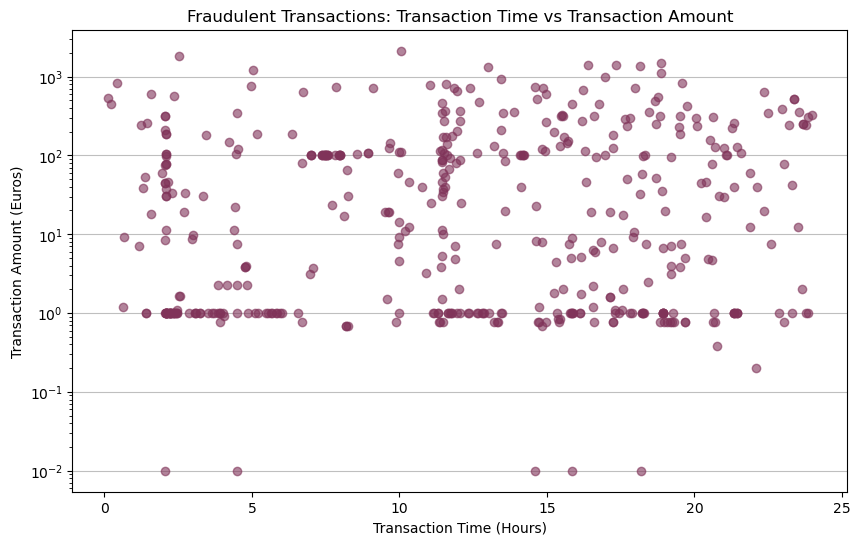

In [16]:
# scatter plot of transaction time vs transaction amount - fraudulent transactions only
plt.figure(figsize=(10, 6))
plt.scatter(time_1, amount_1, color='#803359', zorder=3, alpha= 0.6)
plt.yscale('log')
plt.grid(color='gray', axis='y', alpha=0.5, zorder=1)
plt.title('Fraudulent Transactions: Transaction Time vs Transaction Amount')
plt.xlabel('Transaction Time (Hours)')
plt.ylabel('Transaction Amount (Euros)')

plt.show()


We see that at around 2:00 and 12:00 exactly, there are a number of fraudulent transactions initiated at the same time. This might suggest there are internet bots trying to access payment information at scheduled time intervals. We also see a lot of transactions that are around 1 dollar. This might be done to check if a small payment can be sent through, which might be later followed by a much larger payment.

#### Correlation Matrix

Since we have no information on what the PCA transformed features represent, we can run a correlation matrix to see if there are features that might be closely related. A correlation matrix shows the correlation coefficients of all the features. This coefficient tells us how closely a feature is correlated to another feature. A number close to 1 means the features are positively correlated, while a number close to -1 means the features are negatively correlated. A number closer to 0 means that the features have almost no correlation.

There is an issue with seaborn not displaying the correlation matrix correctly, so we update it to a new version. Restart kernal afterwards.

In [17]:
pip install seaborn --upgrade

Note: you may need to restart the kernel to use updated packages.


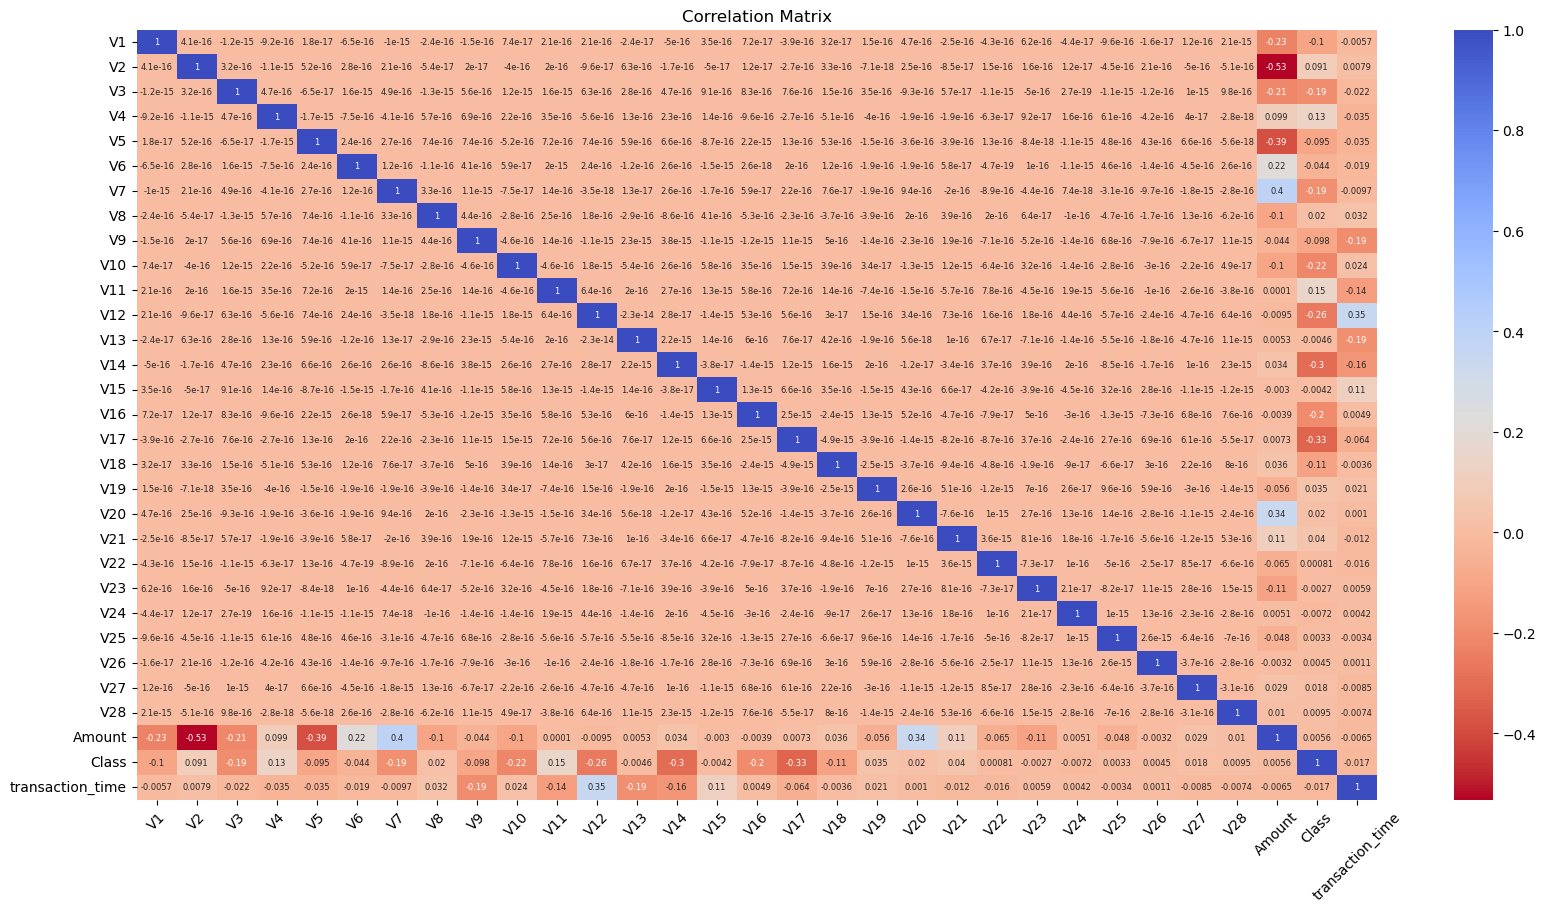

In [18]:
# drop the time column since we already have a new column, transaction_time that tells us the hour of the transaction
df.drop(columns='Time', inplace=True)
corr = df.corr()
plt.figure(figsize=(20, 10))
ax1 = plt.gca()
sns.heatmap(corr, cmap='coolwarm_r', annot=True, annot_kws={'size': 6}, ax=ax1)
ax1.set_title("Correlation Matrix")
plt.xticks(rotation=45)
plt.show()


We don't see much correlation between the PCA transformed features, but we see some correlation between the transaction amount, transaction time, and class.

**However,** we need to remember our data is heavily skewed towards non-fraud transactions. If one class dominates, the correlation matrix might reflect the characteristics of the dominant class, which can skew the strength of correlation coefficients. So we cannot interpret this correlation matrix as an accurate representation of the actual correlation relationships.

We have reached a point in our analysis where we need to consider data balancing for future analysis and model training.

## Data Scaling and Balancing

Before beginning model training, I will identify 5 approaches to data balancing, and will train models and evaluate which of the 5 approaches yields the best results for classification.

1. No Balancing at All
2. Undersampling
3. Oversampling
4. Undersampling + Oversampling
5. Undersampling + Oversampling + Outlier Removal

### 1 - No Balancing

With the approach with no balancing, the models will be trained without any data balancing. We will, however, first scale the remaining data that is not scaled (Time and Amount). We don't need to scale the PCA columns since they are already scaled. 

In [19]:
std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_time'] = std_scaler.fit_transform(df['transaction_time'].values.reshape(-1,1))
# we use robust scaler for transactions because there are a lot of outliers, robust scaler is less prone to outliers 
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))

# drop old columns
df.drop(columns=['transaction_time','Amount'], inplace=True)

In [20]:
# our newly scaled columns
df[['scaled_amount', 'scaled_time']].describe()

,scaled_amount,scaled_time
count,284807.000000,2.848070e+05
mean,0.927124,-6.450611e-16
std,3.495006,1.000002e+00
min,-0.307413,-2.486373e+00
25%,-0.229162,-6.738023e-01
50%,0.000000,8.087540e-02
75%,0.770838,8.195194e-01
max,358.683155,1.618165e+00


Before we proceed with under and over sampling, we need to perform a train test split. Because we are not alloed to see the test data before any analysis, we will have to split the train and test set first. If we sampling the data now, it would be considered contaminated the test results, and we would not be truly learning for unseen data. If we maniputated the test set to have a 50% split between non-fraud and fraud cases, that would not be representative of the actual problem we are trying to solve. 

In [34]:
x = df.drop('Class', axis=1) # training features
y = df['Class'] # classes

# train-test split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

# lets first save the unbalanced data
directory = 'data'
if not os.path.exists(directory):
    os.makedirs(directory)

# test data does not change no matter the sampling
xtest.to_csv(os.path.join(directory, 'xtest.csv'), index=False)
ytest.to_csv(os.path.join(directory, 'ytest.csv'), index=False)

# 1 - no sampling or outlier removal 
xtrain.to_csv(os.path.join(directory, 'xtrain.csv'), index=False)
ytrain.to_csv(os.path.join(directory, 'ytrain.csv'), index=False)


It is expected that this training set will perform the worst out of all the data balancing methods, but we will use this as a base case to compare the other models to.

### 2 - Undersampling

Now we have performed our train test split, we can go ahead with undersampling the negative class (non-fraud transactions). We will want to make a dataset that is 50-50 that the classes are balanced. However, by doing so, we will be removing a large portion of our original data. This is a tradeoff we need to consider, as we need evaluate the tradeoff between less training data and preventing overfitting.

Undersampling the negative class allows us to train the model on a more balanced dataset, making it more senestive to the patterns in the positive class (fraudulent transactions). 

Lets first start by seeing how many fraudulent transactions there are in our training set.

In [35]:
# we concatenate the x_train and y_train back together so we can sample them
concat_train = pd.concat([xtrain, ytrain], axis=1)

# filter class specific dfs
fraud_train = concat_train.loc[concat_train['Class'] == 1]
non_fraud_train = concat_train.loc[concat_train['Class'] == 0]

num_fraud = len(fraud_train)
print("Number of Fraudulent Transactions (Positive Class): ", num_fraud)

Number of Fraudulent Transactions (Positive Class):  394


In [36]:
# undersample the non fraud transactions to match the number of fraud transactions without replacement 
non_fraud_train = non_fraud_train.sample(n=num_fraud, replace=False, random_state=42)

sampled_train = pd.concat([non_fraud_train, fraud_train], axis = 0)

# shuffle dataframe rows
sampled_train = sampled_train.sample(frac=1, random_state=24)

# the mean should be 0.5
sampled_train['Class'].describe()

count    788.000000
mean       0.500000
std        0.500318
min        0.000000
25%        0.000000
50%        0.500000
75%        1.000000
max        1.000000
Name: Class, dtype: float64

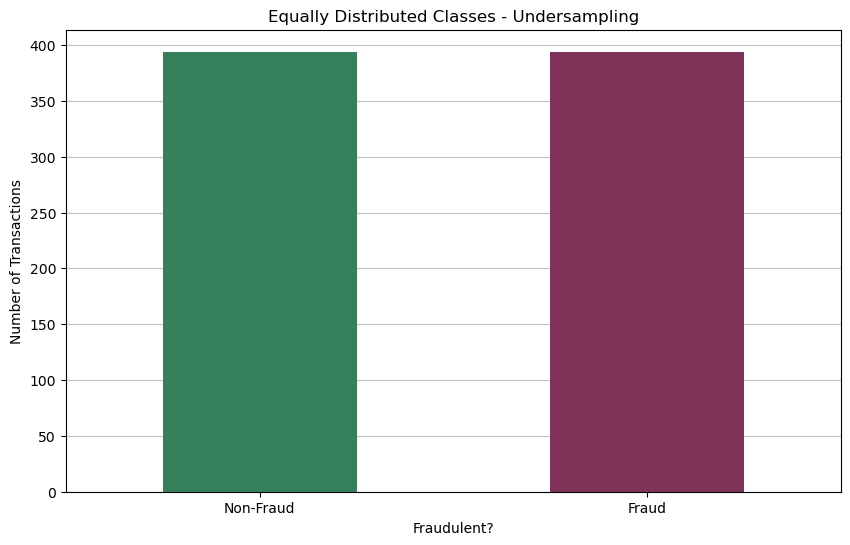

In [37]:
# seperate our training data back into x and y (features and labels)
xtrain_sampled = sampled_train.drop('Class', axis=1)
ytrain_sampled = sampled_train['Class']

# lets plot a bar chart to see our equally distributed classes now
plt.figure(figsize=(10,6))

ax = ytrain_sampled.value_counts().plot(kind='bar', ax=plt.gca(), color=['#33805a','#803359'], zorder=3)
ax.set_title('Equally Distributed Classes - Undersampling')
ax.set_xlabel('Fraudulent?')
ax.set_ylabel('Number of Transactions')
ax.grid(axis='y', color='gray', alpha=0.5, zorder=1)
ax.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

plt.show()

In [38]:
# save our undersampled data
directory = 'data'

# 2 - undersampling
xtrain_sampled.to_csv(os.path.join(directory, 'xtrain_undersampled.csv'), index=False)
ytrain_sampled.to_csv(os.path.join(directory, 'ytrain_undersampled.csv'), index=False)


### 3 - Oversampling with SMOTE

SMOTE (Synthetic Minority Over-sampling Technique) is a technique used to oversample the underrepresented class, particularly in binary classification tasks. Instead of just duplicating the minority class samples, SMOTE creates synthetic samples. These synthetic samples are based on random instances of the minority class, finding their nearest neighbors based on euclidian distance and generating new samples along the line segments connecting them.

SMOTE reduces overfitting and will improve the model performance by introducing synthetic data, but it introduces non-real data into our dataset, which might not be representative of reality. SMOTE might also create data close to class boundaries, which will affect our model's performance on the test data.

In [39]:
sm = SMOTE(sampling_strategy='minority', random_state=242)

xtrain_smote, ytrain_smote = sm.fit_resample(xtrain, ytrain)

# shuffle
smote_combined = pd.concat([xtrain_smote, ytrain_smote], axis=1)
smote_combined = smote_combined.sample(frac=1, random_state=24)
xtrain_smote_shuffled = smote_combined.drop('Class', axis=1)
ytrain_smote_shuffled = smote_combined['Class']

# check our new SMOTE adjusted classes
ytrain_smote.value_counts()

Class
0    227451
1    227451
Name: count, dtype: int64

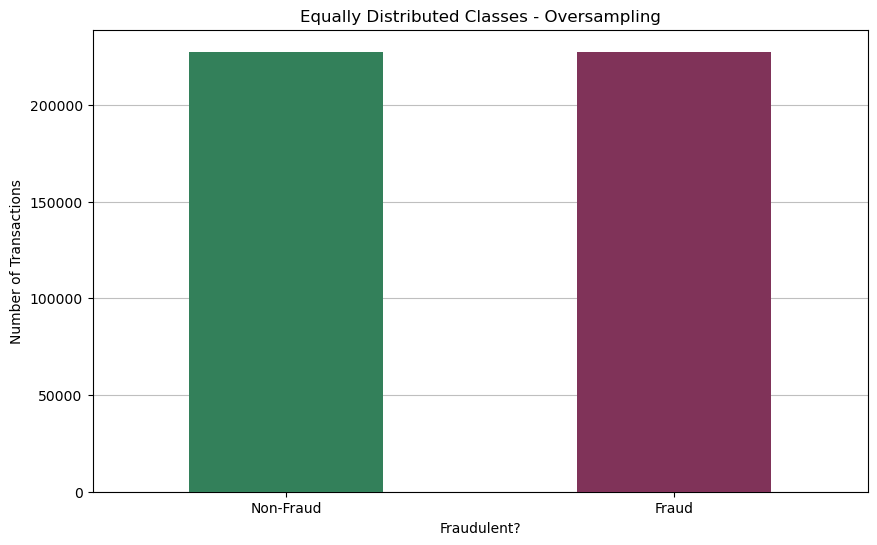

In [40]:
# lets plot a bar chart to see our SMOTE oversampled data
plt.figure(figsize=(10,6))

ax = ytrain_smote.value_counts().plot(kind='bar', ax=plt.gca(), color=['#33805a','#803359'], zorder=3)
ax.set_title('Equally Distributed Classes - Oversampling')
ax.set_xlabel('Fraudulent?')
ax.set_ylabel('Number of Transactions')
ax.grid(axis='y', color='gray', alpha=0.5, zorder=1)
ax.set_xticklabels(['Non-Fraud', 'Fraud'], rotation=0)

plt.show()

In [41]:
# save our oversampled data
directory = 'data'

# 3 - oversampling
xtrain_smote.to_csv(os.path.join(directory, 'xtrain_oversampled.csv'), index=False)
ytrain_smote.to_csv(os.path.join(directory, 'ytrain_oversampled.csv'), index=False)

### 4 - Mixed Sampling (Undersampling + Oversampling)

It would make sense to use both undersampling and oversampling to get the best of both techniques and minimize the disadvantages of each sampling method. However, we need to decide how much to undersample and oversample.

An easy starting point would be 50% of the original non-fraud cases, meaning we would undersample the non-fraud transactions by 50% and oversample the number of fraud cases to match that. This still means we are oversampling the number of fraudulent transactions by a large amount, so what is a reasonable amount to sample?

There is no correct answer, so we will attempt several sampling ratios to determine which one yields the best models.

In [81]:
combined_train = pd.concat([xtrain, ytrain], axis=1)
fraud = combined_train.loc[combined_train['Class'] == 1]
non_fraud = combined_train.loc[combined_train['Class'] == 0]

num_non_fraud = len(non_fraud)

# 50% to 0.5% of non-fraud
percentages = np.geomspace(0.5, 0.005, 5)

# saving an array with filename formatting
mixed_sampling_filenames = []

for pct in percentages:
    # undersampling
    non_fraud_under = non_fraud.sample(n=int(pct * num_non_fraud), replace=False, random_state=42)
    combined_under = pd.concat([non_fraud_under, fraud], axis=0)
    
    xtrain_under = combined_under.drop('Class', axis=1)
    ytrain_under = combined_under['Class']

    # oversampling
    smote = SMOTE(sampling_strategy='minority', random_state=242)
    xtrain_over, ytrain_over = smote.fit_resample(xtrain_under, ytrain_under)
    
    # shuffle after SMOTE
    combined_oversampled = pd.concat([xtrain_over, ytrain_over], axis=1)
    combined_oversampled = combined_oversampled.sample(frac=1, random_state=24)
    xtrain_mix = combined_oversampled.drop('Class', axis=1)
    ytrain_mix = combined_oversampled['Class']
    
    directory = 'data'
    
    # 4 - mixed sampling
    # attach number of datapoints to end of filename
    xtrain_mix.to_csv(os.path.join(directory, f'xtrain_mix_{len(xtrain_mix)}.csv'), index=False)
    ytrain_mix.to_csv(os.path.join(directory, f'ytrain_mix_{len(xtrain_mix)}.csv'), index=False)
    
    print(f"Percentage of Original Non-Fraud: {pct*100:.4g}%")
    print("Total number of training datapoints after mixed sampling: ", len(xtrain_mix))
    
    # append number of datapoints to an array which will be saved to load files later
    mixed_sampling_filenames.append(len(xtrain_mix))
    
mixed_sampling_filenames = np.array(mixed_sampling_filenames)
np.save(os.path.join(directory, 'mixed_sampling_filenames.npy'), mixed_sampling_filenames)

Percentage of Original Non-Fraud: 50%
Total number of training datapoints after mixed sampling:  227450
Percentage of Original Non-Fraud: 15.81%
Total number of training datapoints after mixed sampling:  71926
Percentage of Original Non-Fraud: 5%
Total number of training datapoints after mixed sampling:  22744
Percentage of Original Non-Fraud: 1.581%
Total number of training datapoints after mixed sampling:  7192
Percentage of Original Non-Fraud: 0.5%
Total number of training datapoints after mixed sampling:  2274


### 5 - Mixed Sampling + Removing Outliers

Lets now go back to our correlation matrix and try using our newly mixed sampled data and see if there are any changes to confusion matrix. We expect that all the mixed sampled data to have similiar confusion matrices since they should have the same distribution of data.

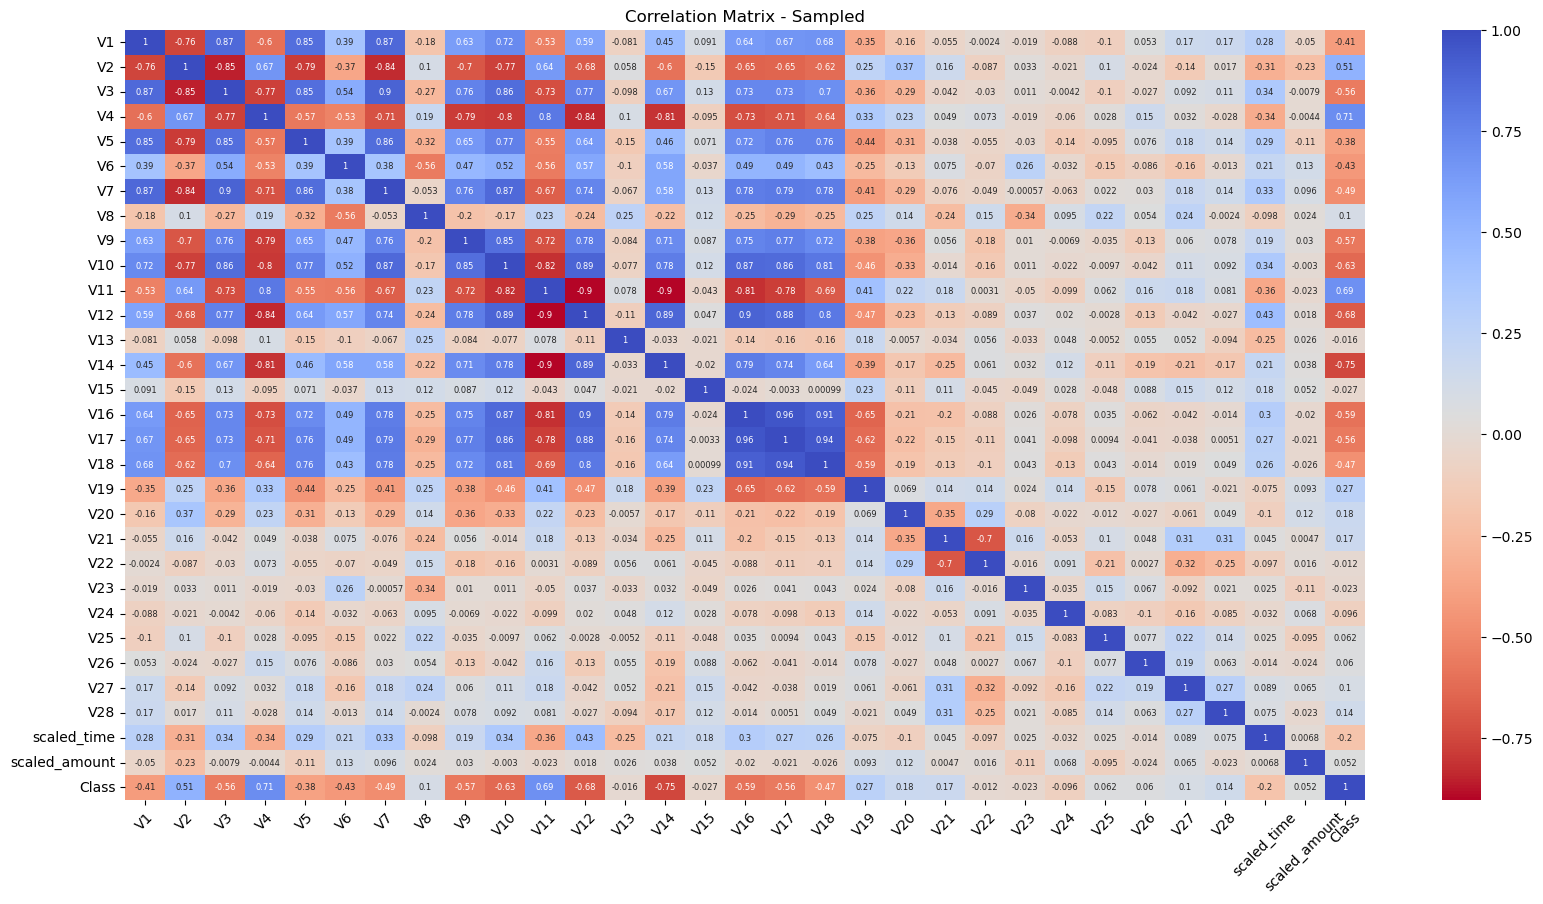

In [59]:
# mixed train with 2274 data points, since they were the last saved variables (creating correlation matrix with too many datapoints would require longer runtime as well)
combined_mixsampled = pd.concat([xtrain_mix, ytrain_mix], axis=1)
corr_mixsampled = combined_mixsampled.corr()
plt.figure(figsize=(20, 10))
ax = plt.gca()
sns.heatmap(corr_mixsampled, cmap='coolwarm_r', annot=True, annot_kws={'size': 6}, ax=ax)
ax.set_title("Correlation Matrix - Sampled")
plt.xticks(rotation=45)
plt.show()

There is a lot more color variation in our correlation matrix now. We see that there are now more features that have strong positive and negative correlations with our labels (Class). To further analyze the correlation relationships, we select the features with the largest correlation coefficients and make box plots for each of them.

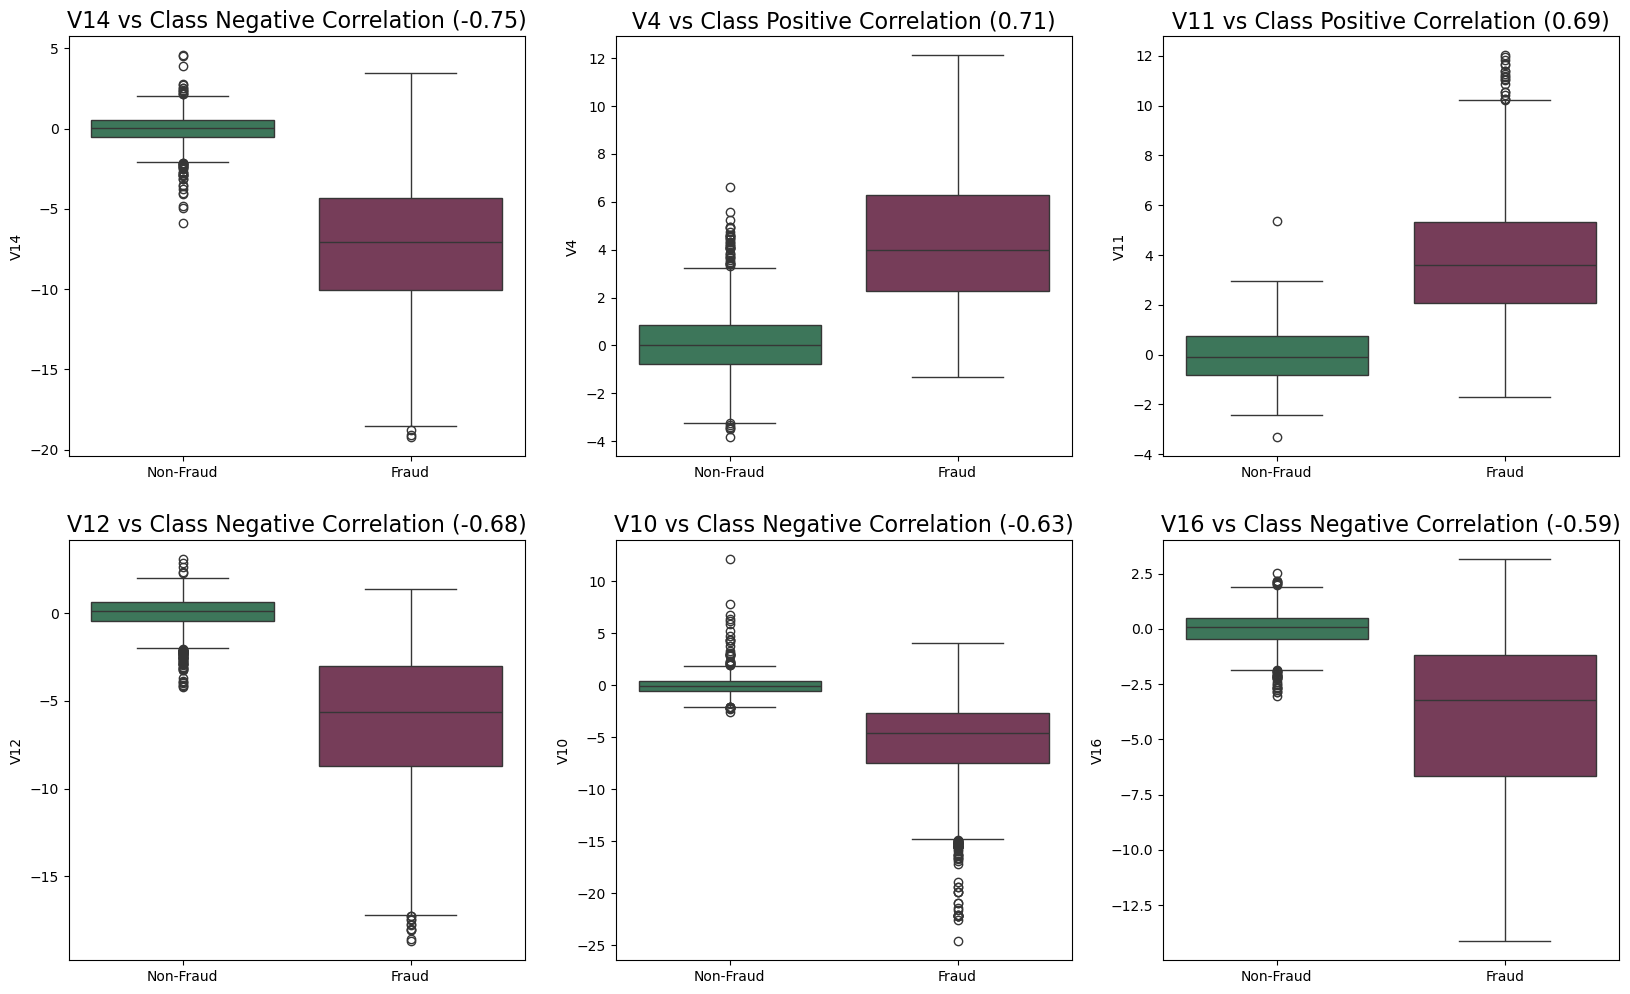

In [60]:
colors = ['#33805a', '#803359']

_, axes = plt.subplots(nrows=2, ncols=3, figsize=(20, 12))

# flatten axes array for iteration
axes = axes.flatten()

# feature name, plot title
names = [
    ('V14', 'V14 vs Class Negative Correlation (-0.75)'),
    ('V4', 'V4 vs Class Positive Correlation (0.71)'),
    ('V11', 'V11 vs Class Positive Correlation (0.69)'),
    ('V12', 'V12 vs Class Negative Correlation (-0.68)'),
    ('V10', 'V10 vs Class Negative Correlation (-0.63)'),
    ('V16', 'V16 vs Class Negative Correlation (-0.59)')
]

for ax, (names, title) in zip(axes, names):
    sns.boxplot(x="Class", y=names, data=combined_mixsampled, palette=colors, ax=ax)
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('')
    ax.set_xticklabels(['Non-Fraud', 'Fraud'])

plt.show()


We see that for the six most correlated features, there are a number of outliers that might affect model training. If we are to remove outliers, we should only remove those that overlap significantly with the opposite class's quartiles. It can also be noted that most of the overlapping outliers are from non-fraud transactions. This is expected because the SMOTE transformation finds the nearest neighbors only, so it is unlikely to generate outliers. It might also suggest that fraudulent transactions before SMOTE do not have as many extreme outliers. Therefore, if we remove outliers, we should only remove them from non-fraudulent transactions that overlap significantly with the fraud quartiles.

In [75]:
# returns df without outliers in specified range
def iqr_filter_outliers(df, feats, filter_range):    
    # we will only remove outliers for Class == 0, non-frauds
    non_frauds = df.loc[df['Class'] == 0]
    frauds = df.loc[df['Class'] == 1]

    
    filtered = non_frauds
    
    for feat in feats:
        # calculate interquartile range
        v14_q1 = filtered[feat].quantile(0.25)
        v14_q3 = filtered[feat].quantile(0.75)
        iqr = v14_q3 - v14_q1

        # interquartile range method forumula
        lower_bound = v14_q1 - 1.5 * iqr
        upper_bound = v14_q3 + 1.5 * iqr
        
        # remove upper bound only
        if filter_range == 'upper':
            filtered = non_frauds[(non_frauds[feat] <= upper_bound)]
        # remove only lower bound
        elif filter_range == 'lower':
            filtered = non_frauds[(non_frauds[feat] >= lower_bound)]
        # remove both bounds
        elif filter_range == 'both':
            filtered = non_frauds[(non_frauds[feat] >= lower_bound) & (non_frauds[feat] <= upper_bound)]
        else:
            print("Invalid filter_range, returning df")
            return df
    
    return df.loc[filtered.index.union(frauds.index)]

Lets filter out the data outside of the lower interquartile ranges for our negatively correlated features and data outside the upper interquartile ranges for our positively correlated features.

In [83]:
# recall the numpy array with number data points of each csv to load mixed sampling training data
directory = 'data'
mixed_sampling_filenames = np.load(os.path.join(directory, 'mixed_sampling_filenames.npy'))

for n in mixed_sampling_filenames:
    xtrain_mix = pd.read_csv(os.path.join(directory, f'xtrain_mix_{n}.csv'))
    ytrain_mix = pd.read_csv(os.path.join(directory, f'ytrain_mix_{n}.csv'))
    
    concat_outliers = pd.concat([xtrain_mix, ytrain_mix], axis=1)

    # sort by negatively and positively correlated features
    feats_neg = ['V14', 'V12', 'V10', 'V16'] # negatively correlated
    feats_pos = ['V4', 'V11'] # positively correlated

    # filter V14 lower bound outliers
    filter_neg = iqr_filter_outliers(concat_outliers, feats_neg, 'lower')
    filtered_both = iqr_filter_outliers(filter_neg, feats_pos, 'upper')

    # see number of outliers removed and relative to original dataset
    num_outliers = filtered_both['Class'].value_counts()[1] - filtered_both['Class'].value_counts()[0]
    print('Number of outliers removed: ', num_outliers)
    print(f'Percentage of original dataset (_train_mix_{n}.csv): ', f'{num_outliers/n*100:.4g}%')

    # split x and y train
    xtrain_filtered = filtered_both.drop('Class', axis=1)
    ytrain_filtered = filtered_both['Class']
    
    # 5 - mixed sampling + outlier removal
    # we keep the original n, even though it is not the number of datapoints anymore, for consistency
    xtrain_filtered.to_csv(os.path.join(directory, f'xtrain_filtered_{n}.csv'), index=False)
    ytrain_filtered.to_csv(os.path.join(directory, f'ytrain_filtered_{n}.csv'), index=False)


Number of outliers removed:  2632
Percentage of original dataset (227450 datapoints):  1.157%
Number of outliers removed:  816
Percentage of original dataset (71926 datapoints):  1.134%
Number of outliers removed:  238
Percentage of original dataset (22744 datapoints):  1.046%
Number of outliers removed:  78
Percentage of original dataset (7192 datapoints):  1.085%
Number of outliers removed:  26
Percentage of original dataset (2274 datapoints):  1.143%


We have now prepared 5 different sets of data to test our model on. We will move to a different notebook to train our models.